<a href="https://colab.research.google.com/github/luoChengwen/Accelerometer_integration/blob/master/don't_overfit_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# from google.colab import files

###https://www.kaggle.com/c/dont-overfit-ii/data
no idea what this data is about ~~~

In [0]:
# train = files.upload()

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [0]:
train= pd.read_csv('/content/train.csv')

In [5]:
train.columns

Index(['id', 'target', '0', '1', '2', '3', '4', '5', '6', '7',
       ...
       '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
      dtype='object', length=302)

In [6]:
train.head(4)

,id,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,-2.246,1.825,-0.912,-0.107,0.305,0.102,0.826,0.417,0.177,-0.673,-0.503,1.864,0.410,-1.927,0.102,-0.931,1.763,1.449,-1.097,-0.686,-0.250,-1.859,1.125,1.009,-2.296,0.385,-0.876,1.528,-0.144,-1.078,...,-0.681,1.250,-0.565,-1.318,-0.923,0.075,-0.704,2.457,0.771,-0.460,0.569,-1.320,-1.516,-2.145,-1.120,0.156,0.820,-1.049,-1.125,0.484,0.617,1.253,1.248,0.504,-0.802,-0.896,-1.793,-0.284,-0.601,0.569,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,0.004,-0.291,2.907,1.085,2.144,1.540,0.584,1.133,1.098,-0.237,-0.498,0.283,-1.100,-0.417,1.382,-0.515,-1.519,0.619,-0.128,0.866,-0.540,1.238,-0.227,0.269,-0.390,-2.721,1.659,0.106,-0.121,1.719,...,0.971,-1.489,0.530,0.917,-0.094,-1.407,0.887,-0.104,-0.583,1.267,-1.667,-2.771,-0.516,1.312,0.491,0.932,2.064,0.422,1.215,2.012,0.043,-0.307,-0.059,1.121,1.333,0.211,1.753,0.053,1.274,-0.612,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,0.137,0.183,0.459,0.478,-0.425,0.352,1.095,0.300,-1.044,0.270,-1.038,0.144,-1.658,-0.946,0.633,-0.772,1.786,0.136,-0.103,-1.223,2.273,0.055,-2.032,-0.452,0.064,0.924,-0.692,-0.067,-0.917,1.896,...,-0.540,-0.299,1.074,-0.748,1.086,-0.766,-0.931,0.432,1.345,-0.491,-1.602,-0.727,0.346,0.780,-0.527,-1.122,-0.208,-0.730,-0.302,2.535,-1.045,0.037,0.020,1.373,0.456,-0.277,1.381,1.843,0.749,0.202,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,0.503,0.274,0.335,-1.148,0.067,-1.010,1.048,-1.442,0.210,0.836,-0.326,0.716,-0.764,0.248,-1.308,2.127,0.365,0.296,-0.808,1.854,0.118,0.380,0.999,-1.171,2.798,0.394,-1.048,1.078,0.401,-0.486,...,-0.083,-0.831,1.251,-0.206,-0.933,-1.215,0.281,0.512,-0.424,0.769,0.223,-0.710,2.725,0.176,0.845,-1.226,1.527,-1.701,0.597,0.150,1.864,0.322,-0.214,1.282,0.408,-0.910,1.020,-0.299,-1.574,-1.618,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238


In [7]:
print(sum(train.isnull().sum()))
print(np.shape(train))
print(np.unique(train.target))
train = train.drop(columns=['id'])
a = train.corr()

0
(250, 302)
[0. 1.]


In [8]:
type(a)
a.head(3)

,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
target,1.000000,0.108966,-0.073319,-0.015141,0.011549,-0.114726,-0.050329,-0.057063,0.004239,-0.048443,-0.085947,-0.013612,-0.031463,0.009103,0.107828,0.063624,-0.094138,-0.144267,0.110998,0.050365,-0.048693,-0.002429,0.045513,-0.018173,-0.051417,0.173096,0.072617,-0.097438,0.056375,-0.041337,0.055357,0.132705,-0.018271,-0.031088,0.373608,-0.032472,-0.015633,0.060833,-0.007289,-0.040545,...,-0.046107,-0.057885,-0.077726,0.018638,0.036513,0.008513,0.017778,0.069989,-0.082616,-0.009661,-0.035870,0.016826,0.113909,0.003967,0.008408,-0.070916,-0.117467,-0.033894,0.014398,-0.071330,0.078811,-0.088500,0.044530,0.078050,-0.033451,0.087762,-0.045833,-0.066705,-0.072923,0.127213,0.039675,0.055694,-0.088930,-0.034363,-0.031964,-0.170501,0.007434,0.056810,-0.134760,-0.075475
0,0.108966,1.000000,-0.003871,-0.010487,-0.047819,0.013967,0.070091,-0.022537,0.002832,-0.060031,-0.052356,0.059263,-0.014094,-0.060538,0.049368,-0.017255,-0.047828,-0.031047,0.013264,-0.043416,-0.005945,-0.000825,0.030775,-0.031150,-0.055822,-0.030686,-0.019718,-0.005644,0.027852,0.035622,-0.008151,0.079281,0.062204,-0.084648,0.077961,-0.044631,0.023800,0.124808,-0.003085,-0.044664,...,0.015049,0.101032,0.009942,0.008299,-0.018995,-0.019378,0.120621,-0.027320,-0.041115,0.036252,-0.013818,-0.022710,0.007584,-0.020473,0.075098,0.054375,-0.028977,-0.041199,0.022243,-0.102684,-0.024006,0.037312,0.135009,0.029303,0.031001,0.033796,0.164564,0.012922,-0.027903,0.034457,-0.023230,0.053416,-0.143668,-0.007530,-0.060824,-0.024839,-0.051288,0.029143,0.065951,0.038523
1,-0.073319,-0.003871,1.000000,0.013573,-0.018884,0.086743,-0.028023,-0.032914,-0.066416,-0.027201,0.035512,0.020358,0.003761,0.027094,-0.111360,-0.030637,-0.084130,0.023147,-0.115217,0.065643,0.051571,0.055748,-0.084465,0.039373,-0.033250,0.069004,0.105601,0.011806,-0.031546,-0.134291,-0.058598,0.022960,0.029663,-0.006578,-0.029111,-0.003974,0.032745,0.128600,0.088257,0.014338,...,0.005799,0.029290,-0.055173,-0.083558,0.064371,-0.025943,-0.145135,0.032671,0.062708,0.030416,0.026795,-0.020315,-0.006171,-0.146324,-0.015831,-0.049975,-0.031120,0.070214,-0.016917,0.032828,0.098995,0.119581,-0.096928,0.066795,-0.047459,0.058864,0.041791,0.096635,-0.131251,-0.070546,-0.006300,-0.077365,-0.021583,-0.054171,-0.046174,0.042820,-0.127499,0.065883,0.055470,-0.056612


In [9]:
a=abs(a)
a.sort_values(by= ['target'],inplace=True)
a.head(10)

,target,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299
75,0.000694,0.023369,0.117148,0.002817,0.121211,0.016941,0.044401,0.178214,0.067901,0.093527,0.038796,0.126527,0.019367,0.032059,0.034279,0.038720,0.157005,0.026081,0.047516,0.116459,0.147142,0.031621,0.090825,0.020440,0.070300,0.032529,0.043072,0.051058,0.035228,0.017756,0.086269,0.045879,0.041142,0.259315,0.006638,0.031297,0.127569,0.040404,0.049786,0.040331,...,0.013533,0.015714,0.108636,0.002225,0.063496,0.111903,0.171761,0.177139,0.089485,0.142021,0.031115,0.011381,0.048668,0.114370,0.064290,0.028541,0.023088,0.016414,0.055959,0.010750,0.020152,0.054174,0.047220,0.019964,0.098302,0.151724,0.113582,0.029680,0.054377,0.028299,0.069751,0.005664,0.001684,0.078773,0.039451,0.032520,0.034023,0.053945,0.049781,0.000569
195,0.000909,0.101548,0.156044,0.099843,0.001879,0.127113,0.046254,0.025200,0.011123,0.053055,0.163375,0.030072,0.021025,0.041526,0.079727,0.001540,0.041791,0.013536,0.070691,0.013752,0.056762,0.004144,0.062373,0.020544,0.005675,0.065381,0.112287,0.086019,0.026499,0.051109,0.033305,0.019044,0.112719,0.033802,0.059315,0.000020,0.071111,0.102875,0.073745,0.039519,...,0.041646,0.024452,0.100375,0.039725,0.096258,0.082970,0.020718,0.000294,0.006912,0.093290,0.041458,0.043712,0.033371,0.088812,0.077651,0.058331,0.035611,0.023143,0.016981,0.059143,0.083477,0.086354,0.022174,0.046554,0.023070,0.099118,0.006956,0.063699,0.042966,0.004951,0.044493,0.054086,0.006081,0.024001,0.046961,0.154013,0.012301,0.094601,0.009346,0.074856
172,0.001375,0.058438,0.035819,0.007705,0.094334,0.037648,0.013376,0.091900,0.008001,0.087341,0.031627,0.045359,0.122039,0.019432,0.002200,0.041614,0.099545,0.001003,0.029369,0.048492,0.057609,0.091590,0.013165,0.008939,0.007967,0.053717,0.047756,0.037380,0.079617,0.003976,0.030586,0.050395,0.101914,0.086756,0.085835,0.038243,0.076499,0.114480,0.079669,0.028728,...,0.015435,0.046168,0.066347,0.000917,0.037487,0.070016,0.005511,0.021457,0.025069,0.113896,0.060023,0.088481,0.116186,0.060343,0.060904,0.075196,0.019987,0.062899,0.048468,0.027940,0.001640,0.041164,0.013733,0.092814,0.027589,0.038402,0.003779,0.079384,0.091730,0.024045,0.056747,0.096137,0.069239,0.028020,0.021364,0.037362,0.001565,0.028213,0.011222,0.076948
224,0.002248,0.024380,0.067241,0.015143,0.170201,0.086168,0.059768,0.112911,0.005257,0.068000,0.011421,0.103233,0.013096,0.053004,0.055353,0.066795,0.036150,0.014013,0.043497,0.045130,0.026359,0.008793,0.035284,0.035795,0.013139,0.008264,0.046219,0.016083,0.069432,0.054589,0.044312,0.016777,0.073360,0.108177,0.000425,0.051909,0.028808,0.010937,0.022997,0.058787,...,0.019452,0.046933,0.097792,0.062947,0.045215,0.033858,0.055859,0.044832,0.073408,0.069066,0.037903,0.000560,0.007242,0.050070,0.020115,0.030707,0.109212,0.055412,0.081648,0.023033,0.019788,0.090387,0.009515,0.038546,0.026798,0.004973,0.019255,0.031303,0.093514,0.003243,0.009755,0.015072,0.003834,0.011203,0.105588,0.052905,0.079265,0.010470,0.138338,0.087211
20,0.002429,0.000825,0.055748,0.007613,0.001301,0.052647,0.037632,0.090969,0.037427,0.060797,0.066107,0.046507,0.009396,0.035017,0.045642,0.003312,0.018586,0.062880,0.005705,0.035947,0.050480,1.000000,0.002561,0.070983,0.030310,0.008438,0.118135,0.038843,0.023846,0.164065,0.004283,0.026130,0.136155,0.089629,0.069597,0.007847,0.050125,0.064355,0.106098,0.026106,...,0.096248,0.042711,0.058920,0.055356,0.075671,0.068572,0.033875,0.107652,0.164387,0.023132,0.057861,0.045903,0.081110,0.012094,0.124010,0.000529,0.045576,0.058535,0.056229,0.053502,0.048491,0.010273,0.045309,0.012249,0.067132,0.105056,0.027041,0.070566,0.008665,0.040411,0.057285,0.029771,0.066776,0.078849,0.125156,0.107947,0.012653,0.027744,0.049494,0.080048
74,0.002632,0.024216,0.048285,0.087128,0.042038,0.010513,0.029251,0.016694,0.026211

In [10]:
col_var = a[(a.target>.03) &(a.target<1)].index
col_var[:10]
len(col_var)


210

In [11]:
print(type(col_var))


<class 'pandas.core.indexes.base.Index'>


In [12]:
X = train
print(np.shape(X))
X = X[[i for i in np.array(col_var)]]
print(np.shape(X))
# X = X.drop(columns=['target'])
print(np.shape(X))

(250, 301)
(250, 210)
(250, 210)


In [13]:
import copy
y = train.target
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
X_a = copy.deepcopy(X1)
X1 = np.array(X1).reshape(-1,14,15,1)
print(y.head(6))
y = np.array(y).reshape(-1,)
print(sum(y==1),len(y),np.shape(X1))


0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
5    1.0
Name: target, dtype: float64
160 250 (250, 14, 15, 1)


In [0]:
import tensorflow as tf

In [15]:
tf.__version__

'2.0.0-beta0'

In [0]:
# !pip install tensorflow==2.0.0-beta0

In [17]:
import tensorflow as tf
tf.__version__


'2.0.0-beta0'

## method1: directly use all variables and ingest into CNN

In [0]:
from tensorflow import keras
model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(64,(3,3), activation='relu', input_shape=(14,15,1)),
     tf.keras.layers.MaxPooling2D(2,2),
     tf.keras.layers.Dense(64, activation='relu'), 
     tf.keras.layers.Dropout(.1), 
     tf.keras.layers.Dense(64, activation='relu'),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dense(16, activation='relu'),
     tf.keras.layers.Dropout(.2),
     tf.keras.layers.Dropout(.3),
     tf.keras.layers.Dense(1, activation='sigmoid')
])


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 12, 13, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 6, 64)          0         
_________________________________________________________________
dense (Dense)                (None, 6, 6, 64)          4160      
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 64)          0         
_________________________________________________________________
dense_1 (Dense)              (None, 6, 6, 64)          4160      
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                3

In [0]:
model.compile(optimizer='SGD',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state=12)
# print(np.shape(X_train),np.shape(X_test))
print(np.shape(X1),np.shape(y))

(250, 14, 15, 1) (250,)


In [22]:
history = model.fit(X1,y,epochs=200,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 250 samples
Epoch 1/200
250/250 [==============================] - 0s 2ms/sample - loss: 0.6981 - accuracy: 0.4520
Epoch 2/200
250/250 [==============================] - 0s 384us/sample - loss: 0.6926 - accuracy: 0.5080
Epoch 3/200
250/250 [==============================] - 0s 371us/sample - loss: 0.6869 - accuracy: 0.5800
Epoch 4/200
250/250 [==============================] - 0s 367us/sample - loss: 0.6840 - accuracy: 0.6120
Epoch 5/200
250/250 [==============================] - 0s 404us/sample - loss: 0.6833 - accuracy: 0.6200
Epoch 6/200
250/250 [==============================] - 0s 392us/sample - loss: 0.6816 - accuracy: 0.6160
Epoch 7/200
250/250 [==============================] - 0s 375us/sample - loss: 0.6766 - accuracy: 0.6480
Epoch 8/200
250/250 [==============================] - 0s 387us/sample - loss: 0.6765 - accuracy: 0.6120
Epoch 9/200
250/250 [==========================

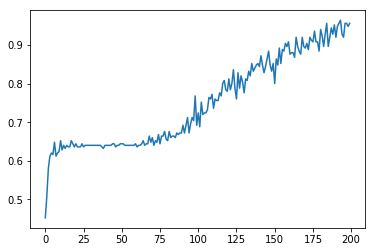

In [23]:
plt.plot(range(len(history.history['accuracy'])),history.history['accuracy'])

In [24]:
model.predict(X1)[:10]
# test = files.upload()

array([[0.9971458 ],
       [0.15907758],
       [0.9637408 ],
       [0.9333396 ],
       [0.9890728 ],
       [0.91423446],
       [0.9836037 ],
       [0.99452394],
       [0.9628898 ],
       [0.956831  ]], dtype=float32)

In [0]:
test=pd.read_csv('/content/test.csv')

In [26]:
np.shape(test)

(19750, 301)

In [27]:
test.columns



Index(['id', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '290', '291', '292', '293', '294', '295', '296', '297', '298', '299'],
      dtype='object', length=301)

In [28]:
test2 = test.drop(columns='id')
print(np.shape(test))
# scaler = MinMaxScaler()


(19750, 301)


In [29]:
# scaler = MinMaxScaler()
import copy
test_x = test2[[i for i in np.array(col_var)]]
test_x = StandardScaler().fit_transform(test_x)
test_x2 = copy.deepcopy(test_x)
test_x = np.array(test_x).reshape(-1,14,15,1)
print(np.shape(test_x))
test_x = np.array(test_x).reshape(-1,14,15,1)
print(np.shape(test_x))

(19750, 14, 15, 1)
(19750, 14, 15, 1)


In [0]:
y_pre = model.predict(test_x)
y_pre = [0 if i<=.5 else 1 for i in y_pre]

In [31]:
y_pre[:10]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [0]:
ypre = pd.DataFrame(y_pre)

pd.concat([test[['id']], pd.DataFrame(y_pre,columns=['target'])],axis=1).to_csv('/content/submission.csv',index=False)

### The results only yield 59.6% accuracy on leaderboard, I cannot even find my ranking on the leaderboard ~~~~ noooooooo

## model2: stacking model


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn import svm
import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [34]:
clf1 = KNeighborsClassifier()
clf2 = DecisionTreeClassifier()
clf3 = XGBClassifier()
clf4 = svm.SVC()
mec = LogisticRegression()
clf_f = StackingClassifier(classifiers=[clf1,clf2,clf3,clf4], meta_classifier = mec )
print(np.shape(X_a),np.shape(y))
for clf, label in zip([clf1,clf2,clf3,clf4, clf_f], ['KNN','DT','XGB','SVC','stakcing Classifier1']):
                      scores = model_selection.cross_val_score(clf,X_a,y, cv=5, scoring = 'accuracy')
                      print(np.round(scores.mean(),3),np.round(scores.std(),3),label)

(250, 210) (250,)
0.636 0.056 KNN
0.572 0.078 DT
0.712 0.048 XGB
0.696 0.029 SVC
0.696 0.07 stakcing Classifier1


In [0]:
model = clf_f.fit(X_a,y)


In [36]:
print(np.shape(test_x2))

(19750, 210)


In [0]:
ypre2 = clf_f.predict(test_x2)

In [38]:
ypre2[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [0]:

pd.concat([test[['id']], pd.DataFrame(ypre2,columns=['target'])],axis=1).to_csv('/content/submission2.csv',index=False)

### Accuracy is 62.6%, why!!!!!!!!!! :(

## the highest accuracy in leader board is around 93% on public board and 88% in private leaderboard, tomorrow check to see whether there are available notebooks to learn`~~~